In [28]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 5]

In [72]:
r = 100
ray_length = r*2
p = 0.1
ray_steps = 500
ns = [100,1000,10000]

do_eps = True

eps = [0] * len(ns)

if do_eps:
    vol = (4/3) * np.pi * r**3
    for idx,n in enumerate(ns):
        part_sep = (vol/n)**(1/3)
        eps[idx] = 0.1 * part_sep

name = "Plots/Histograms/Comparisons/Uniform/DOUBLE_ns=" + str(ns).replace(" ","").replace(",","_") + "_r="+str(r)+"_p=0,1_eps=" + str([round(i,2) for i in eps]).replace(",","_").replace(".",",").replace(" ","")
title = "Double Precision Uniform Distribution, \n" + r"$R=" + str(r) + r",\rho=" + str(p) + r"$"

In [73]:
data = {}

for idx,n in enumerate(ns):
    x = list(PyCC.ray_rs(ray_length,ray_steps))
    xs = []
    ys = []
    meta_xs = []
    meta_ys = []

    rays = []
    for vector in PyCC.random_vectors(100):
        rays.append(PyCC.ray(vector,ray_length,ray_steps))

    for i in range(10):
        df = PyCC.Distributions.Uniform(r=r,n=n,p=p)

        for ray in rays:
            ray_out,stats = PyCC.evaluate(df,evaluate_at=ray,steps=0,precision="double",eval_only=True,eps=eps[idx])
            ray_analytics = PyCC.Analytic.Uniform(r=r,p=p,positions=ray)
            ray_phis = ray_out.loc[:,"phi"].to_numpy()
            x = PyCC.points2radius(ray)
            y = ray_phis - ray_analytics
            meta_xs.append(x)
            meta_ys.append(y)
            xs += list(x)
            ys += list(y)

    xs = np.array(xs)
    ys = np.array(ys)

    data[n] = (xs,ys,meta_xs,meta_ys)

In [74]:
plot_pretty()

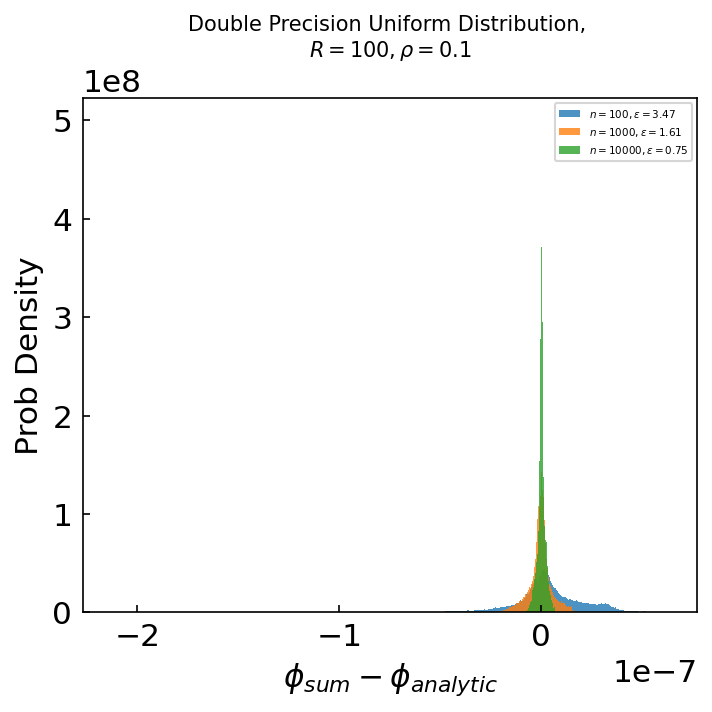

In [75]:
for idx,n in enumerate(ns):
    xs,ys,meta_xs,meta_ys = data[n]
    plt.hist(ys,bins=ray_steps,density=True,label=r"$n=" + str(n) + r",\epsilon=" + str(round(eps[idx],2)) + r"$",alpha=0.8)
plt.legend()
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Prob Density")
plt.ticklabel_format(axis="both",style="sci",scilimits=(0,0))
plt.title(title,pad=20,size=10)
plt.tight_layout()
plt.savefig(name + "_histogram.jpg")
plt.show()

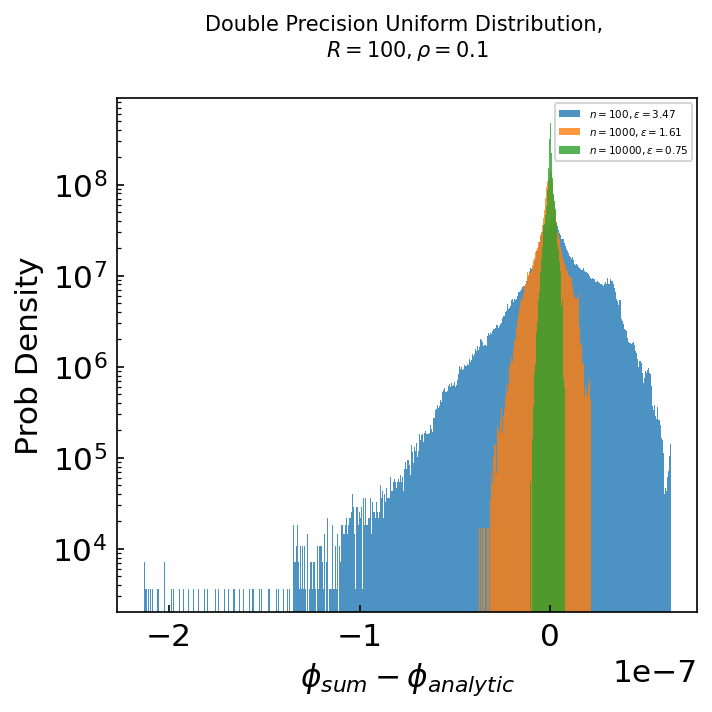

In [76]:
for idx,n in enumerate(ns):
    xs,ys,meta_xs,meta_ys = data[n]
    plt.hist(ys,bins=ray_steps,density=True,label=r"$n=" + str(n) + r",\epsilon=" + str(round(eps[idx],2)) + r"$",alpha=0.8)
plt.yscale('log')
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Prob Density")
plt.legend()
plt.ticklabel_format(axis="x",style="sci",scilimits=(0,0))
plt.title(title,pad=20,size=10)
plt.tight_layout()
plt.savefig(name + "_histogramlog.jpg")
plt.show()

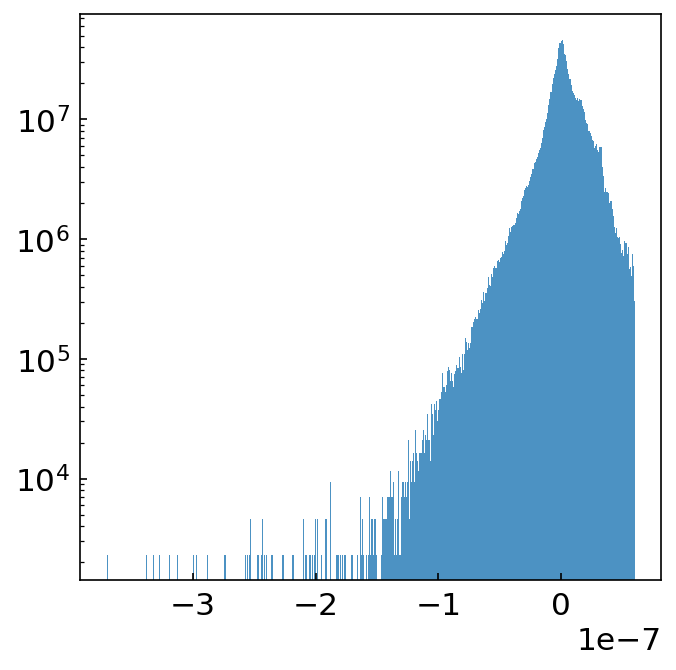

In [71]:
for idx,n in enumerate(ns[:1]):
    xs,ys,meta_xs,meta_ys = data[n]
    plt.hist(ys,bins=ray_steps,density=True,label=r"$n=" + str(n) + r",\epsilon=" + str(round(eps[idx],2)) + r"$",alpha=0.8)
plt.yscale('log')
plt.show()